# Assignment_4

Ques 1 (a) Plot the sequence x[n] for 4 time periods.


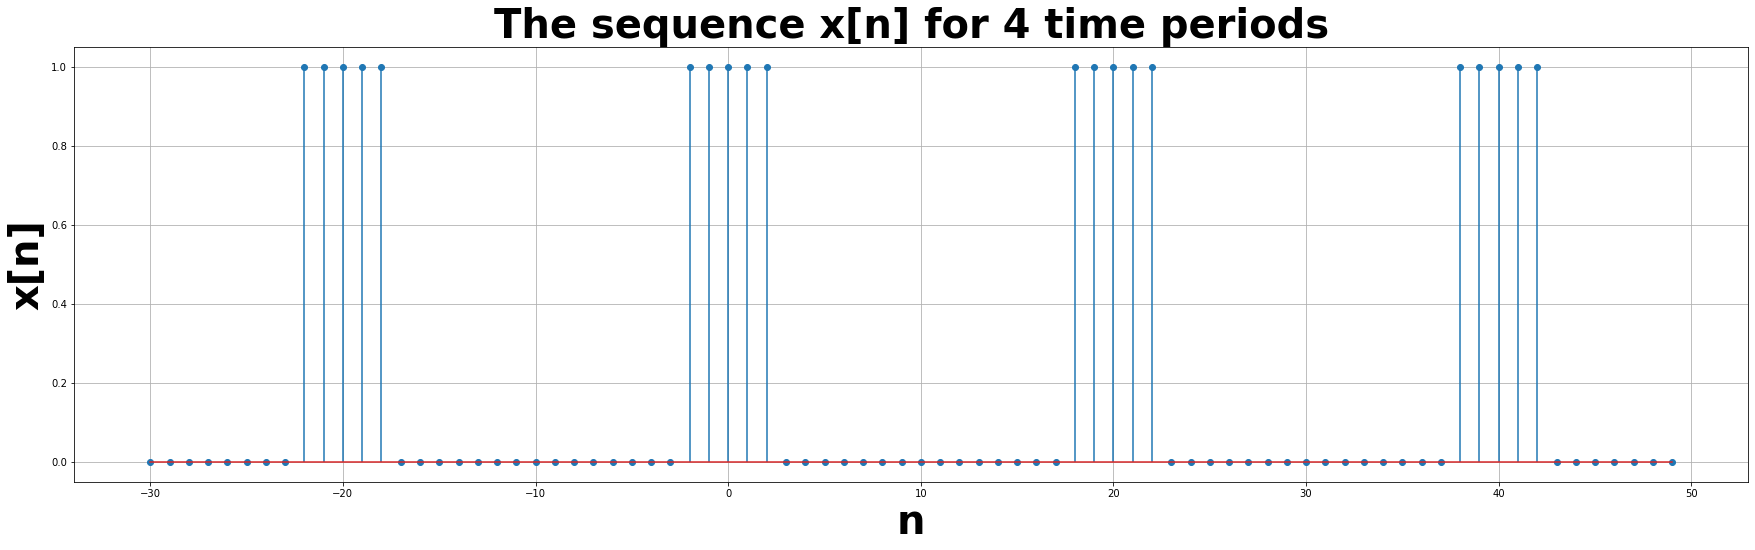

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#plotting for 4 time periods
def x1(n,m):
    x1=[]
    for i in n:
        if(i>=-2+m and i<=2+m):
            x1.append(1)
        else:
            x1.append(0)
    return x1
plt.figure(figsize=(30,8))
n=np.arange(-30,50,1)
X=[sum(i) for i in zip(x1(n,0),x1(n,-20),x1(n,20),x1(n,40))]
plt.stem(n,X)
plt.title('The sequence x[n] for 4 time periods', size =40,weight = 'extra bold')
plt.xlabel('n' , size = 40 , weight = 'bold')
plt.ylabel('x[n]' , size = 40 , weight = 'bold')
plt.grid()
plt.show()

Ques 1 (b) Determine and plot the magnitude, |ck| and phase coefficients, ∠ck of discrete time Fourier series (DTFS) of x[n].


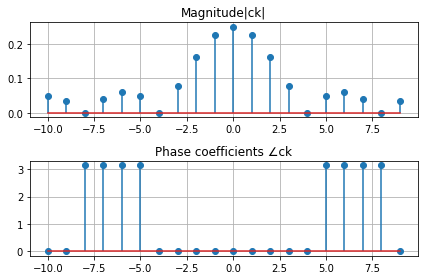

In [11]:
##DTFS
n1=np.arange(-10,10,1)
x_n=np.array(x1(n1,0))
def c(k,n,x,N):
    c=np.exp(-1j*2*k*n*np.pi/N)
    return np.dot(x,c)/N
k=np.arange(-10,10,1)
plt.subplot(2,1,1)
mag=[np.abs(c(i,n1,x_n,20)) for i in k] #N=20
plt.stem(k,mag)
plt.title('Magnitude|ck|')
plt.grid()
plt.subplot(2,1,2)
phase=[np.angle(c(i,n1,x_n,20)) for i in k]
plt.stem(k,phase)
plt.title('Phase coefficients ∠ck')
plt.tight_layout()
plt.grid()
plt.show()

Ques 2
(a) Reconstruct x[n] from 4 DTFS coefficients (i.e., M = 2) and plot the original signal (x[n]) and the reconstructed signal (ˆx[n]).

(b) Reconstruct x[n] from 10 DTFS coefficients (i.e., M = 5) and plotthe original signal (x[n]) and the reconstructed signal (ˆx[n]).

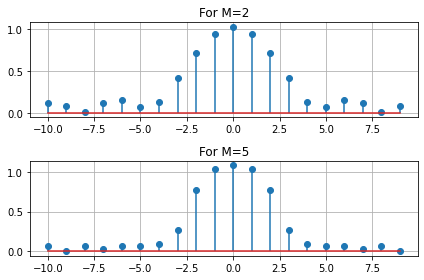

In [6]:
#function to reconstruct x(n) from DTFS coefficients
import cmath
def recon_x(dtfs,M,n1):
    x=np.zeros(20,dtype=np.complex128)
    for i in range(20):
        for k in range(-M,M+1):
            x[i]+=dtfs[k+10]*cmath.exp(1j*k*2*np.pi*n1[i]/20)
    return x

dtfs=[c(i,n1,x_n,20) for i in k]    

recon1=(np.abs(recon_x(dtfs,2,n1)))
plt.subplot(2,1,1)
plt.stem(n1,recon1)
plt.title("For M=2")
plt.grid()
    
recon2=np.abs(recon_x(dtfs,5,n1))
plt.subplot(2,1,2)
plt.stem(n1,recon2)
plt.title('For M=5')
plt.grid()
plt.tight_layout()
plt.show()

observations

Ques 3

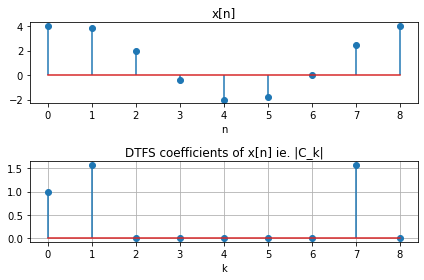

In [16]:
def DTFS(n,x,N):
    ck = np.zeros(len(n),dtype='complex')
    for k in range(N):
        for i in range(N):
            ck[n==k] += x[i]*np.exp(-1j*k*2*np.pi*i/N)
        ck[n==(0-k)] = np.conj(ck[n==k])
    ck = ck/N
    return ck
def q3f(n):
    N=8
    return 1+np.sin(2*np.pi*n/N)+3*np.cos(2*np.pi*n/N)
n=np.arange(0,9,1)
x3n=q3f(n)
dt3=DTFS(n,x3n,8)
# Plot for X[n]
plt.subplot(2,1,1)
plt.stem(q3f(n))
plt.xlabel('n')
plt.title('x[n]')
# Plotting the DTFS Coefficients of X[n]
plt.subplot(2,1,2)
plt.stem(abs(dt3))
plt.xlabel('k')
plt.title('DTFS coefficients of x[n] ie. |C_k|')
plt.grid()
plt.tight_layout()
plt.show()

Ques 4

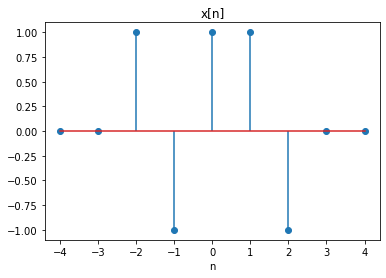

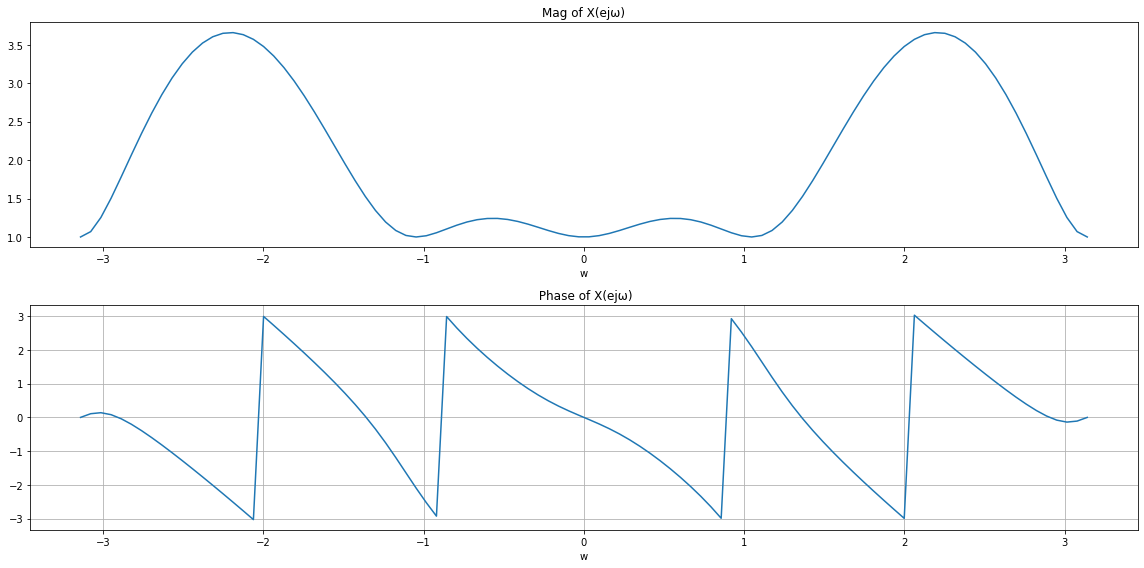

In [24]:
# Defining the function for DTFT
def dtft(x,w):
    X=np.zeros(len(w),dtype='complex')
    for i in range(len(x)):
        for k in range(len(w)):
            X[k] +=x[i]*np.exp(-1j*w[k]*i)
    return X
def q4f(n):
    if n in (-2,0,1): # n for which the mag of x[n] is 1
        return 1
    if n in (-1,2):  # n for which the mag of x[n] is -1
        return -1
    else: return 0   # for all n except above value of x[n] is 0
    
w=np.linspace(-np.pi,np.pi,100)
n_4=np.arange(-4,5,1)  
res4=[q4f(i) for i in n_4]
q4r=dtft(res4,w)
plt.figure(figsize=(6,4))
plt.stem(n_4,res4)
plt.xlabel('n')
plt.title('x[n]')
plt.show()
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.plot(w,abs(q4r))
plt.xlabel('w')
plt.title('Mag of X(ejω)')
plt.subplot(2,1,2)
plt.plot(w,np.angle(q4r))
plt.xlabel('w')
plt.title(' Phase of X(ejω)' )
plt.grid()
plt.tight_layout()
plt.show()

Ques 6(a)

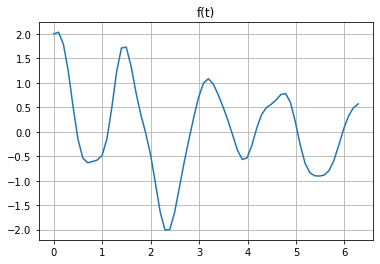

In [39]:
def f(t):
    x=np.exp(-(t*2)/10)*(np.sin(2*t)+2*np.cos(4*t)+0.4*np.sin(t)*np.sin(10*t))
    return x
t=np.linspace(0,2*np.pi,64)
plt.plot(t,f(t))
plt.title('f(t)')
plt.grid()
plt.show()

Ques 6(b)

In [28]:
D=np.ones((64,64),dtype='complex')
w=np.exp(-1j*(2*np.pi)/64)
for i in range(64):
    for j in range(64):
        D[i,j]=(w**(i*j))
print(f"The 64*64 DFT matrix is:")
print(D)

The 64*64 DFT matrix is:
[[1.        +0.j         1.        +0.j         1.        +0.j
  ... 1.        +0.j         1.        +0.j
  1.        +0.j        ]
 [1.        +0.j         0.99518473-0.09801714j 0.98078528-0.19509032j
  ... 0.95694034+0.29028468j 0.98078528+0.19509032j
  0.99518473+0.09801714j]
 [1.        +0.j         0.98078528-0.19509032j 0.92387953-0.38268343j
  ... 0.83146961+0.55557023j 0.92387953+0.38268343j
  0.98078528+0.19509032j]
 ...
 [1.        +0.j         0.95694034+0.29028468j 0.83146961+0.55557023j
  ... 0.63439328-0.77301045j 0.83146961-0.55557023j
  0.95694034-0.29028468j]
 [1.        +0.j         0.98078528+0.19509032j 0.92387953+0.38268343j
  ... 0.83146961-0.55557023j 0.92387953-0.38268343j
  0.98078528-0.19509032j]
 [1.        +0.j         0.99518473+0.09801714j 0.98078528+0.19509032j
  ... 0.95694034-0.29028468j 0.98078528-0.19509032j
  0.99518473-0.09801714j]]


In [40]:
f=f(t).reshape(64,1)
Y=np.dot(D,f)
print(f"The first 64 fourier coefficients are:")
print(Y)

The first 64 fourier coefficients are:
[[ 5.00616634+0.00000000e+00j]
 [ 6.10882698+2.01112580e-01j]
 [ 4.14890447-1.54983503e+01j]
 [ 0.21561388+5.25997009e+00j]
 [35.08150551+4.81676565e+00j]
 [ 0.67918323-8.61671206e+00j]
 [ 0.21932504-4.44468416e+00j]
 [ 0.34204564-2.95672793e+00j]
 [ 0.58110774-1.99746754e+00j]
 [ 3.56312876-1.13409134e+00j]
 [ 0.11888881-3.33367638e+00j]
 [-2.68399983-3.32579318e+00j]
 [ 0.52768543-4.51638847e-01j]
 [ 0.60447688-8.19468426e-01j]
 [ 0.61252138-8.30205577e-01j]
 [ 0.61895181-7.81731039e-01j]
 [ 0.62531412-7.20467409e-01j]
 [ 0.63125831-6.58125123e-01j]
 [ 0.63660132-5.98150196e-01j]
 [ 0.64130655-5.41465614e-01j]
 [ 0.64540398-4.88127328e-01j]
 [ 0.64894766-4.37886699e-01j]
 [ 0.65199644-3.90400369e-01j]
 [ 0.65460586-3.45311752e-01j]
 [ 0.65682505-3.02281873e-01j]
 [ 0.65869607-2.60999280e-01j]
 [ 0.66025408-2.21181178e-01j]
 [ 0.66152791-1.82570967e-01j]
 [ 0.66254074-1.44934469e-01j]
 [ 0.66331067-1.08055826e-01j]
 [ 0.66385128-7.17334691e-02j]


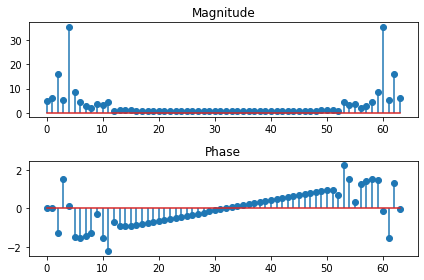

In [41]:
mag=[np.abs(i) for i in Y]
k=np.arange(0,64)
plt.subplot(2,1,1)
plt.stem(k,mag)
plt.title('Magnitude')
plt.subplot(2,1,2)
phase=[np.angle(i) for i in Y]
plt.stem(k,phase)
plt.title('Phase')
plt.tight_layout()
plt.show()

Ques 7

![](Image06.jpeg)

Ques 8

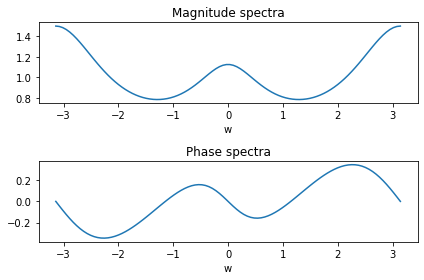

In [27]:
def hf(w):
    z=np.exp(1j*w)
    return 18*np.power(z,3)/((18*np.power(z,3))+(3*(z**2))-4*z-1)
w=np.linspace(-np.pi,np.pi,100)
plt.subplot(2,1,1)
plt.plot(w,abs(hf(w)))
plt.xlabel('w')
plt.title('Magnitude spectra')

plt.subplot(2,1,2)
plt.plot(w,np.angle(hf(w)))
plt.xlabel('w')
plt.title('Phase spectra' )
plt.tight_layout()
plt.show()

Ques 9

![](Image01.jpeg)

![](Image02.jpeg)

![](Image03.jpeg)

Ques 10

![](Image04.jpeg)

![](Image05.jpeg)